In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
model=sys.path.append('/content/drive/MyDrive/my_model')

import keras


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import imutils
import numpy as np

In [ ]:
model_path = '/content/drive/MyDrive/my_model.keras'
model = keras.models.load_model(model_path)

In [ ]:
!pip install imutils scikit-learn

import os
import cv2
import imutils
import numpy as np

from imutils import contours
from sklearn.preprocessing import LabelBinarizer



classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
LB = LabelBinarizer()
LB.fit(classes)


def get_letters(img_path):

    letters = []

    if not os.path.exists(img_path):
        print(f"Error: Image file not found at path: {img_path}")
        return letters, None

    image = cv2.imread(img_path)

    if image is None:
        print(f"Error: Could not load image from path: {img_path}")
        return letters, None

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = contours.sort_contours(cnts, method="left-to-right")[0]

    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            roi = gray[y:y + h, x:x + w]
            thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            thresh = cv2.resize(thresh, (32, 32), interpolation=cv2.INTER_CUBIC)
            thresh = thresh.astype("float32") / 255.0
            thresh = np.expand_dims(thresh, axis=-1)
            thresh = thresh.reshape(1, 32, 32, 1)
            ypred = model.predict(thresh)
            ypred = LB.inverse_transform(ypred)
            [x] = ypred
            letters.append(x)

    return letters, image

def get_word(letter):
    word = "".join(letter)
    return word

In [ ]:
import matplotlib.pyplot as plt


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
AAXT57


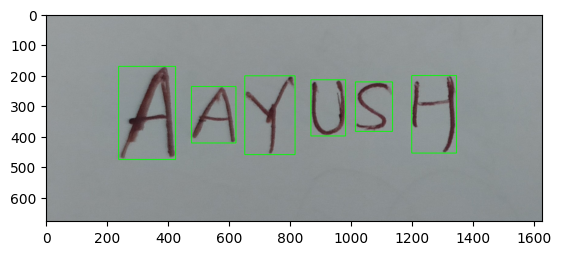

In [ ]:
letter, image = get_letters("/content/drive/MyDrive/IMG_20250408_233420.jpg")

if image is not None:
    word = get_word(letter)
    print(word)
    plt.imshow(image)
else:
    print("Image could not be loaded or processed.")